# Time Series Project on Sunspot Data

Dataset: Use the sunspot.month dataset available in the datasets package. This
dataset contains the monthly number of sunspots observed from 1749 to 1983.

1. Data Exploration:

i. Load the sunspot.month dataset and explore its structure.

ii. Plot the time series to visualize any trends, seasonality, and patterns.

2. Stationarity and Tricky Transformation:

i. Apply the Augmented Dickey-Fuller test to assess the stationarity of the
original time series.

ii. If the series is non-stationary, attempt to find a transformation that
makes it stationary.

iii. Explain the reasoning behind the transformation and any challenges
encountered.

3. Model Identification and Selection:

i. Examine the ACF and PACF plots of the transformed time series.

ii. Identify potential ARIMA model orders and provide reasoning.

iii. Discuss whether any unusual patterns or difficulties were encountered in
the identification process.

4. Advanced Model Fitting:

i. Fit an ARIMA model to the transformed time series based on your
manual identification.

ii. Additionally, use the auto.arima() function to compare the automatically
selected model with your manual choice.

iii. Discuss any differences between the two model selections.

5. Forecasting Challenges:

i. Generate a forecast for the next 24 months using both the manually
selected and automatically selected ARIMA models.

ii. Discuss any challenges or considerations specific to forecasting in this
dataset.

6. Evaluation and Interpretation: (Optional)

i. Evaluate the accuracy of the forecasts using appropriate measures.

ii. Provide an interpretation of the forecast results and any insights gained
from the analysis.



### What are Sunspots?

Sunspots are phenomena on the Sun's photosphere that appear as temporary spots that are darker than the surrounding areas.

For more information
<a href="https://en.wikipedia.org/wiki/Sunspot">Click Here</a>



## Exploratory Data Analysis

Lets load the data first and see some elements of it.

In [18]:
data(sunspot.month)
data(sunspot.year)

print(head(sunspot.month))

[1] 58.0 62.6 70.0 55.7 85.0 83.5


In [19]:
print(head(sunspot.year))

[1]  5 11 16 23 36 58


In [20]:
# Checking whether it is a data frame or a time-series object
class(sunspot.month)

[1] "ts"

In [21]:
# To check no of data points
print(dim(data.frame(sunspot.month)))

[1] 3177    1


In [22]:
data = list(sunspot.month,sunspot.year)
monthly = data[[1]]
yearly = data[[2]]

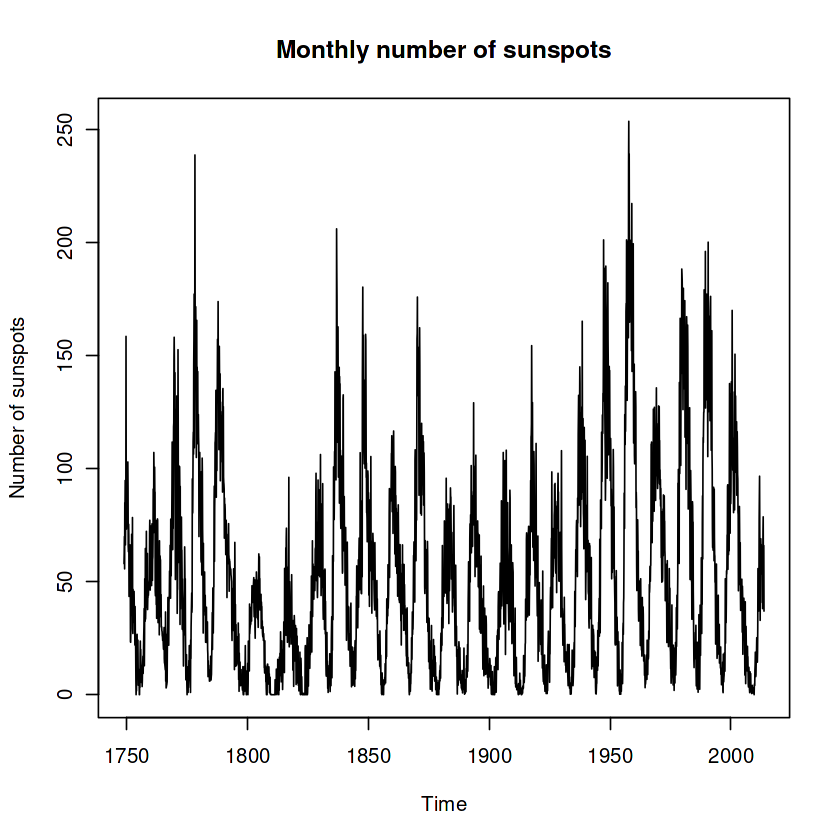

In [23]:
plot(monthly,
    main="Monthly number of sunspots",
    ylab="Number of sunspots")

The plot is way too clumsy, so lets take a smaller window view. But there seems to be a cyclical component for sure. Through visual inspection the period of the circle seems to be about 9-10 years.

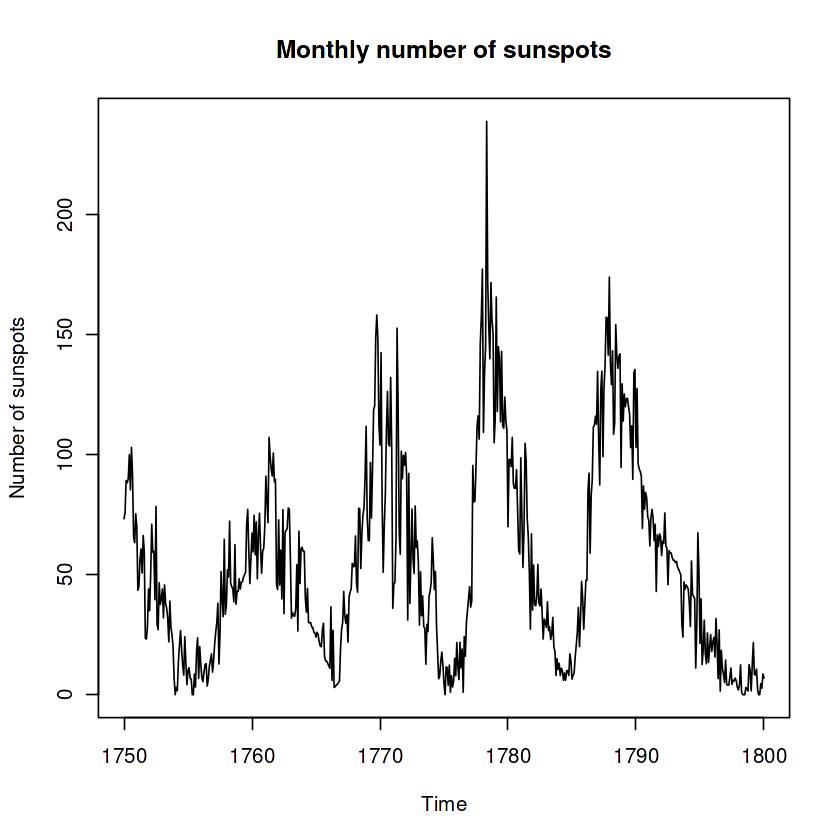

In [24]:
plot(window(monthly,start=1750,end=1800),
    main="Monthly number of sunspots",
    ylab="Number of sunspots",
    type='l')

From both these plots, we dont see any huge trend in the number of sunspots(the yearly data may contradict that), but there may exist a cyclical
component as from 1800 - 1825 there is little slump and then again from 1875-1950, but not so conclusive from 
the plots.

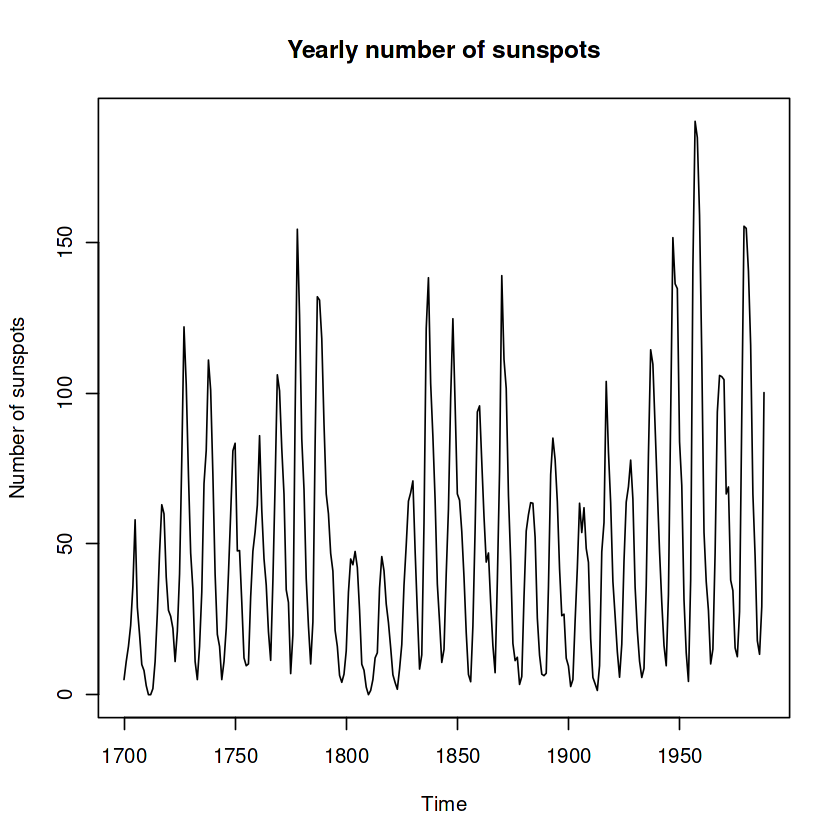

In [25]:
# Plotting the yearly data to see whether there is any trend
plot(yearly,
    main="Yearly number of sunspots",
    ylab="Number of sunspots")

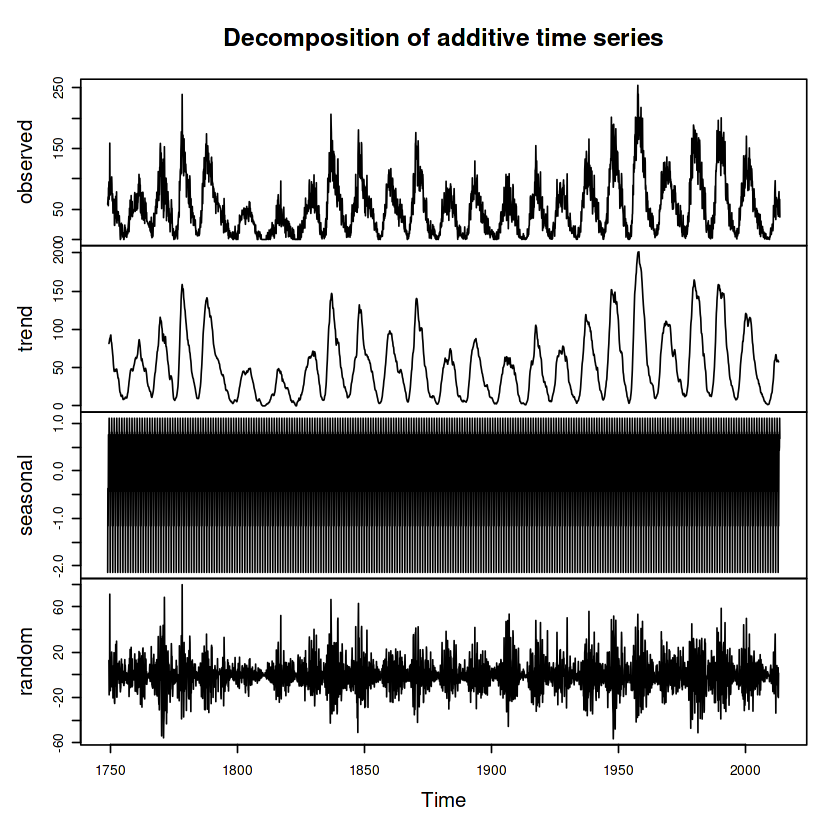

In [26]:
# Decomposing the time series data into its components
plot(decompose(monthly))

As the concept of trend says that it should be smooth, we can see that there is hardly much smoothness in the trend, so we can safely say from this decompostion that there is an irregular trend.

The seasonal component is way too dirty...😅

To properly understand the seasonal component lets check for a smaller window of data

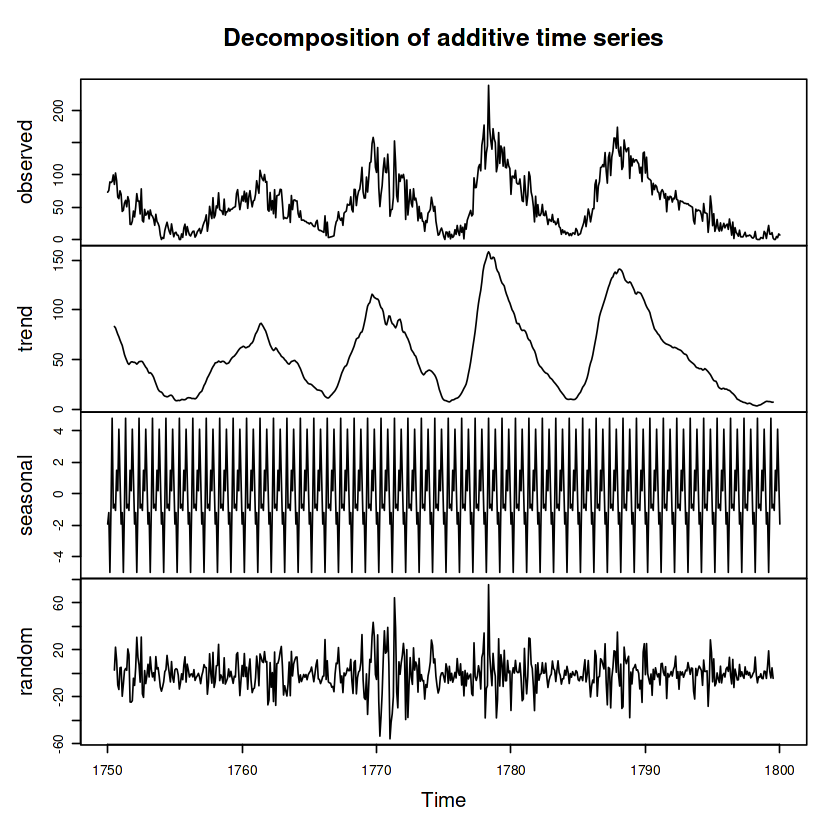

In [27]:
plot(decompose(window(monthly,start=1750,end=1800)))

There is a seasonal component for this time series data, so this data has a seasonal and cyclical component and an irregular trend.And we can assume the additive model here.

## Deseasonalizing the data

In [28]:
dts = decompose(monthly)
ds_monthly = monthly - dts$seasonal

Plotting the deseasonalized data

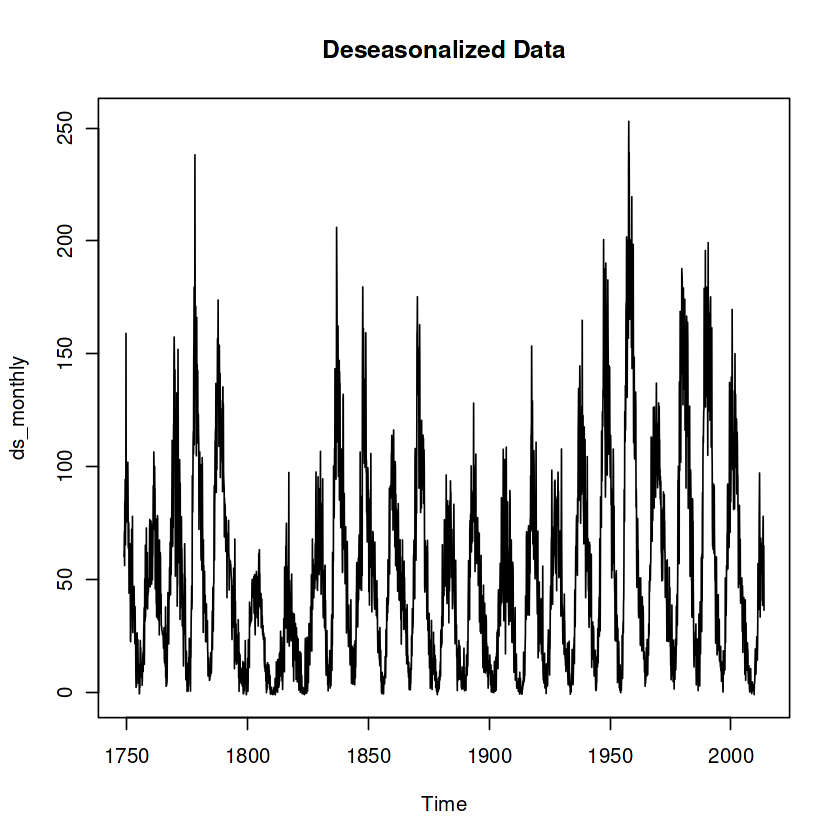

In [29]:
plot(ds_monthly,
    main="Deseasonalized Data")

In [128]:
# Using a smaller dataset to get clearer plot and also we can use as test set the rest part
ds_monthly = window(monthly,start=1900,end=2000)
ds_monthly_test = window(monthly,start=c(2000,2),end=c(2003,1))

## Modeling the data



#### ARIMA Model

In [70]:
# Test for stationarity using Augmented Dickey-Fuller test
adf_test <- adf.test(ds_monthly)
adf_test


	Augmented Dickey-Fuller Test

data:  ds_monthly
Dickey-Fuller = -3.6256, Lag order = 10, p-value = 0.03022
alternative hypothesis: stationary


As it is not stationary then we can apply the ARIMA model only after differencing


In [71]:
# Model selection using auto.arima
auto_arima_model = forecast :: auto.arima(ds_monthly)
summary(auto_arima_model)

Series: ds_monthly 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      1.3970  -0.4344  -1.7907  0.8253
s.e.  0.0452   0.0428   0.0297  0.0279

sigma^2 = 288.2:  log likelihood = -5099.28
AIC=10208.56   AICc=10208.61   BIC=10234.01

Training set error measures:
                     ME    RMSE      MAE MPE MAPE     MASE         ACF1
Training set 0.09771694 16.9408 12.24363 NaN  Inf 0.447737 -0.006085319

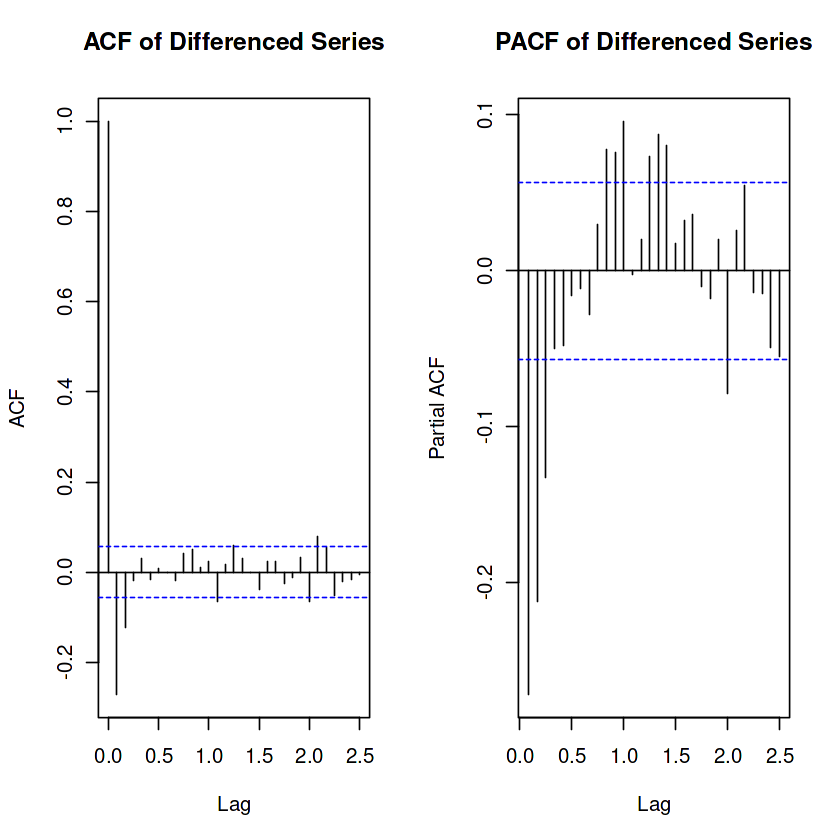

In [72]:
# ACF and PACF plots to identify potential ARIMA model orders
par(mfrow = c(1, 2))
acf(diff(ds_monthly), main = "ACF of Differenced Series")
pacf(diff(ds_monthly), main = "PACF of Differenced Series")

The acf shows that a AR model with 2 parameters might be a good estimate.

In [73]:
# Fit an ARIMA(2,1,2) model as an example
arima_model <- arima(ds_monthly, order = c(2, 1, 2))
summary(arima_model)


Call:
arima(x = ds_monthly, order = c(2, 1, 2))

Coefficients:
         ar1      ar2      ma1     ma2
      1.3970  -0.4344  -1.7907  0.8253
s.e.  0.0452   0.0428   0.0297  0.0279

sigma^2 estimated as 287.2:  log likelihood = -5099.28,  aic = 10208.56

Training set error measures:
                     ME    RMSE      MAE MPE MAPE      MASE         ACF1
Training set 0.09771694 16.9408 12.24363 NaN  Inf 0.9237164 -0.006085319

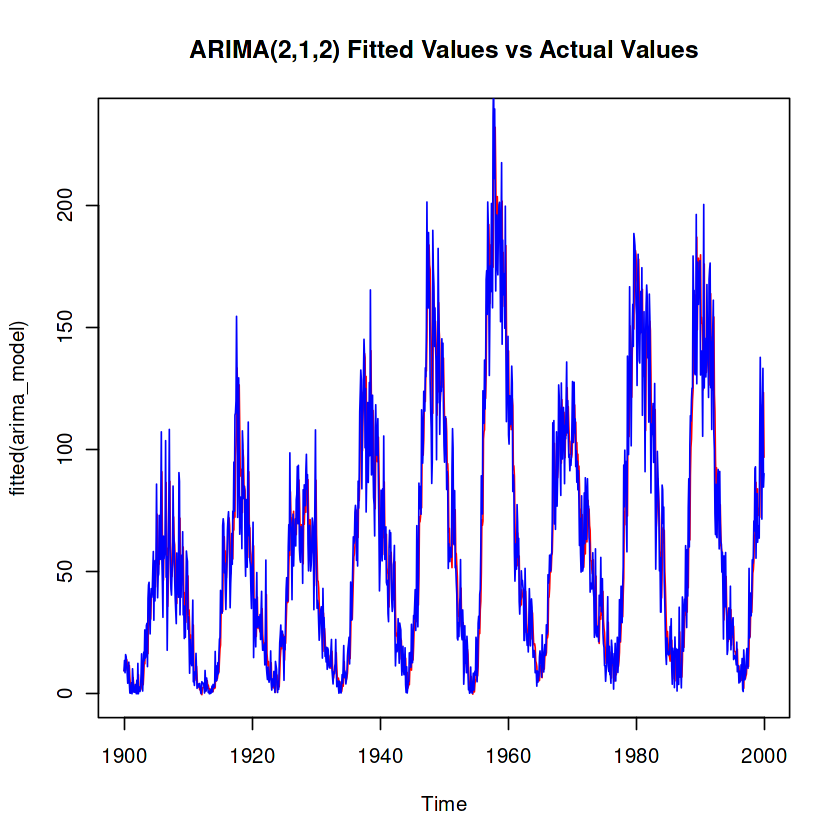

In [74]:
# Plot the fitted values against the actual values

plot(fitted(arima_model), col = "red", main = "ARIMA(2,1,2) Fitted Values vs Actual Values")
lines(ds_monthly,col='blue')

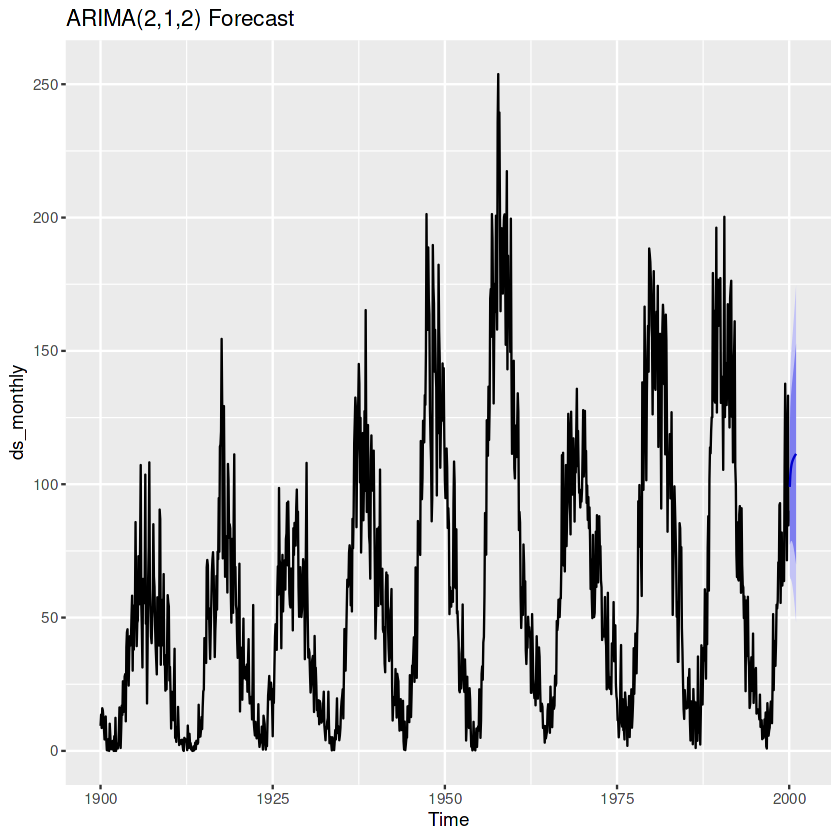

In [85]:
# Forecast using the ARIMA model
forecast_values <- forecast(arima_model, h = 12)

autoplot(forecast_values, main = "ARIMA(2,1,2) Forecast")

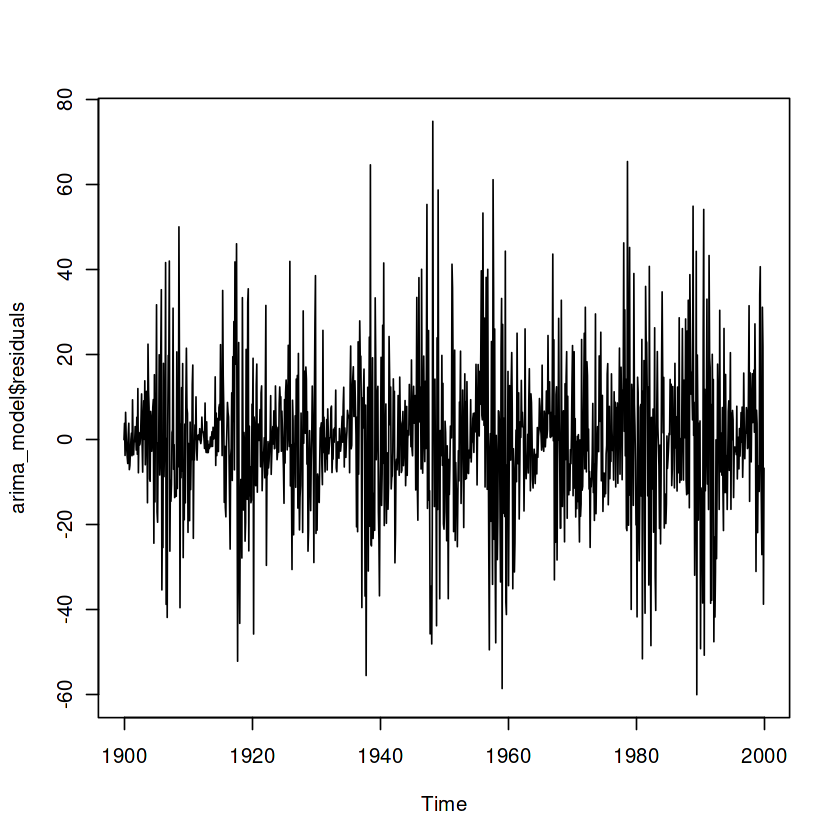

In [76]:
plot(arima_model$residuals)

The residual plot shows a bit of a cyclical pattern and form a wave like form, it seems like we need to remove the cyclical component to get a better fit.


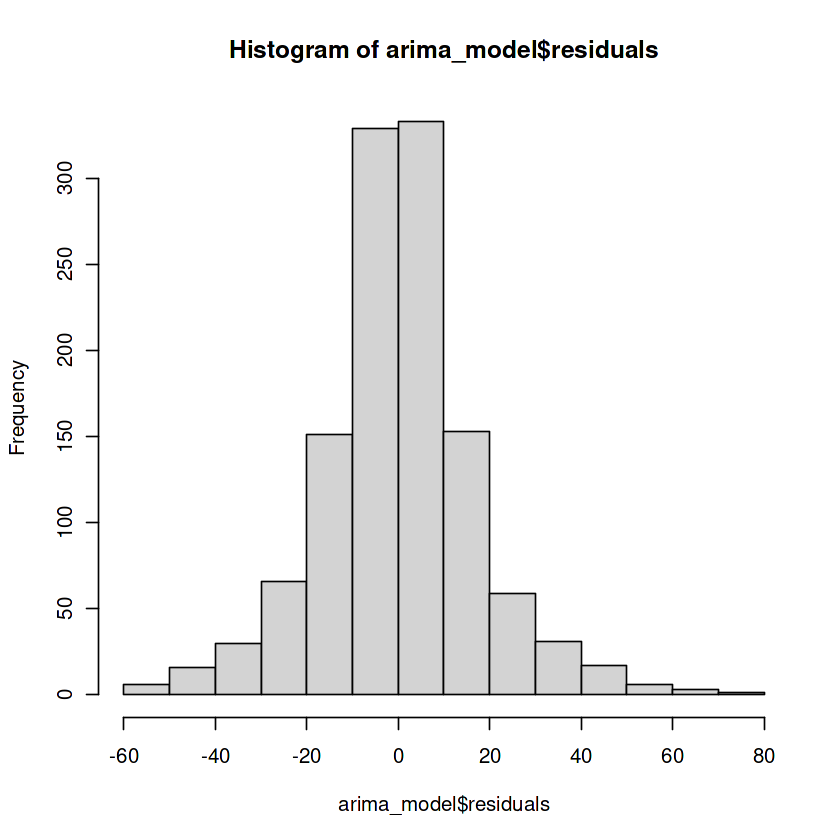

In [78]:
hist(arima_model$residuals)

The errors are quite well symmetric and very close to a normal distribution and the RMSE are quite low, so the ARIMA model fits quite well to the above data.We can use some transformation for stabilising the cycle and get a little better fit, lets try...


In [97]:
log_monthly = log(ds_monthly + 1)
summary(log_monthly)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.934   3.922   3.636   4.527   5.540 

In [98]:
arima_model <- arima(log_monthly, order = c(2, 1, 2))
summary(arima_model)


Call:
arima(x = log_monthly, order = c(2, 1, 2))

Coefficients:
         ar1      ar2      ma1     ma2
      1.1701  -0.2473  -1.6759  0.7321
s.e.  0.0533   0.0479   0.0406  0.0371

sigma^2 estimated as 0.2086:  log likelihood = -762.49,  aic = 1534.98

Training set error measures:
                      ME      RMSE      MAE  MPE MAPE      MASE         ACF1
Training set 0.002807786 0.4564851 0.319994 -Inf  Inf 0.9197597 0.0002785022

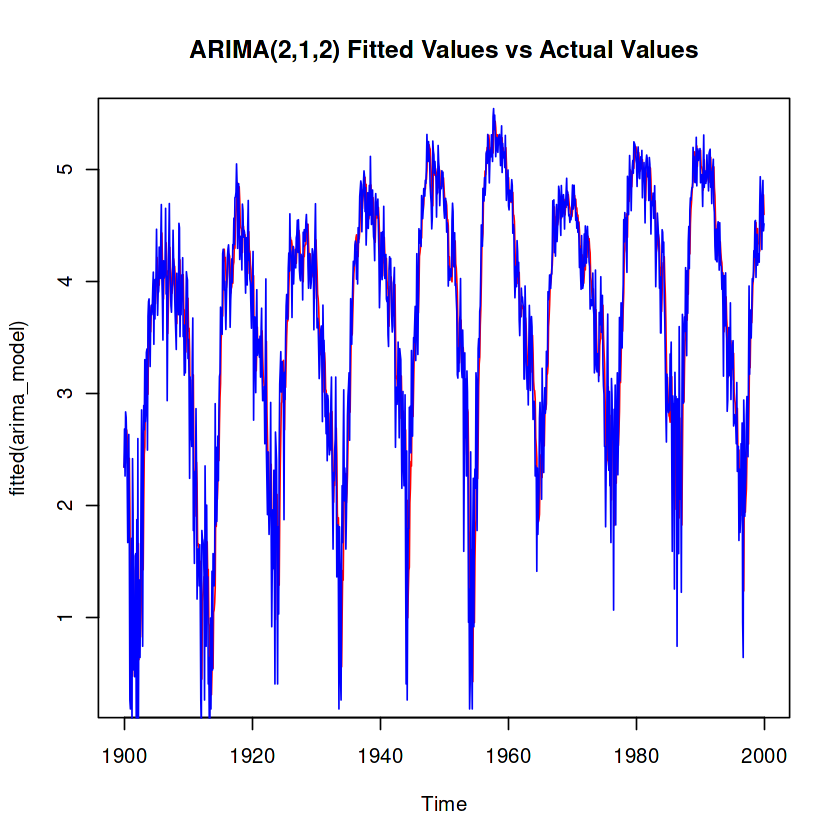

In [100]:
# Plot the fitted values against the actual values

plot(fitted(arima_model), col = "red", main = "ARIMA(2,1,2) Fitted Values vs Actual Values")
lines(log_monthly,col='blue')

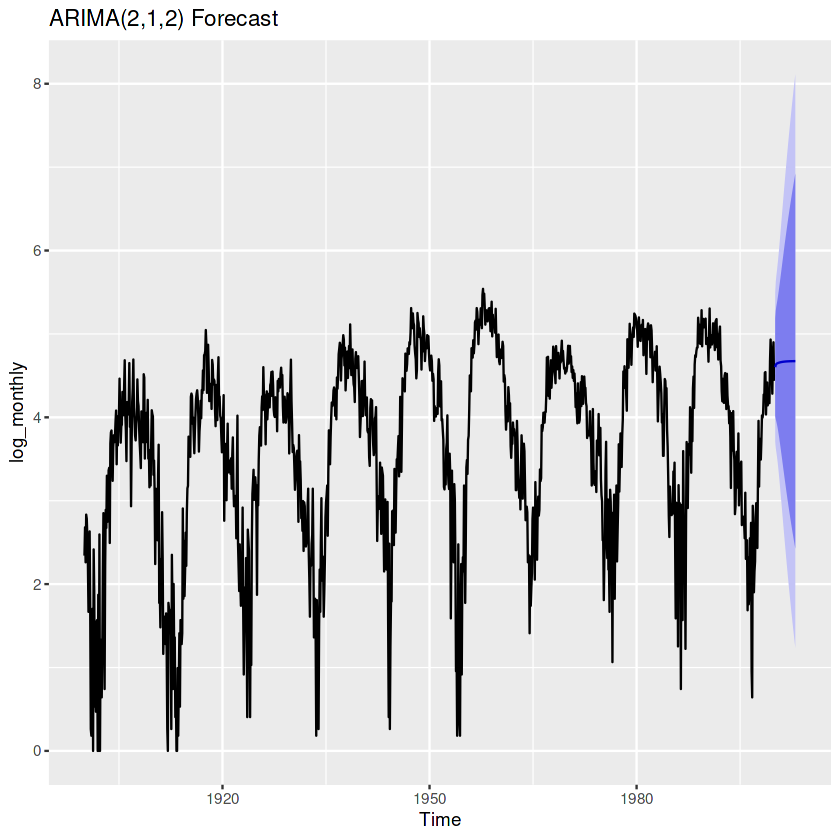

In [114]:
# Forecast using the ARIMA model
forecast_values <- forecast(arima_model, h = 36)

autoplot(forecast_values, main = "ARIMA(2,1,2) Forecast")

In [115]:
summary(forecast_values)


Forecast method: ARIMA(2,1,2)

Model Information:

Call:
arima(x = log_monthly, order = c(2, 1, 2))

Coefficients:
         ar1      ar2      ma1     ma2
      1.1701  -0.2473  -1.6759  0.7321
s.e.  0.0533   0.0479   0.0406  0.0371

sigma^2 estimated as 0.2086:  log likelihood = -762.49,  aic = 1534.98

Error measures:
                      ME      RMSE      MAE  MPE MAPE      MASE         ACF1
Training set 0.002807786 0.4564851 0.319994 -Inf  Inf 0.4637228 0.0002785022

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 2000       4.601328 4.016075 5.186581 3.706261 5.496395
Mar 2000       4.629094 3.976250 5.281938 3.630656 5.627532
Apr 2000       4.639478 3.948412 5.330544 3.582584 5.696372
May 2000       4.644761 3.917507 5.372015 3.532521 5.757000
Jun 2000       4.648374 3.881930 5.414818 3.476200 5.820548
Jul 2000       4.651295 3.841961 5.460630 3.413525 5.889066
Aug 2000       4.653820 3.798309 5.509331 3.345428 5.962211
Sep 2000       4.656051 3.751744

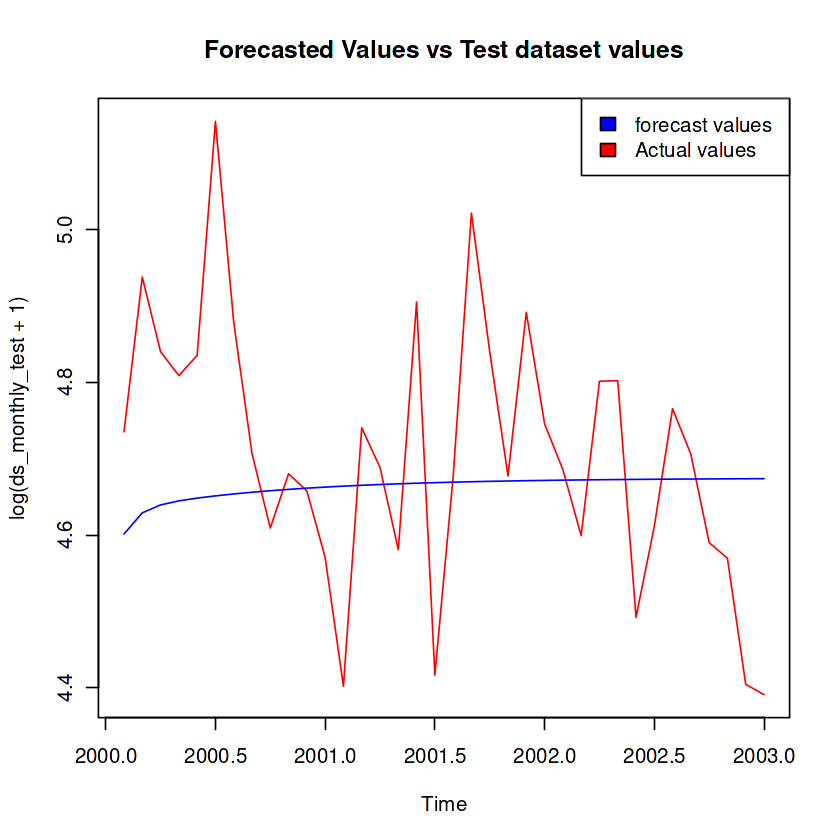

In [134]:
plot(log(ds_monthly_test+1),col="red",main="Forecasted Values vs Test dataset values")
lines(forecast_values$mean,col="blue")
legend("topright", legend=c("forecast values", "Actual values"),  
       fill = c("blue","red") )

In [142]:
accuracy = forecast_values$mean - log(ds_monthly_test+1)
cat("Testing Error on 36 data points:",sum(accuracy^2),'\n')
cat("Training Error :",arima_model$sigma2)

Testing Error on 36 data points: 1.186498 


Training Error : 0.2085523

Testing error is very high here..


In [130]:
forecast_values$mean
ds_monthly_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,,4.601328,4.629094,4.639478,4.644761,4.648374,4.651295,4.653820,4.656051,4.658038,4.659811,4.661394
2001,4.662808,4.664071,4.665199,4.666206,4.667106,4.667910,4.668628,4.669270,4.669843,4.670354,4.670811,4.671220
2002,4.671584,4.671910,4.672201,4.672461,4.672693,4.672900,4.673086,4.673251,4.673399,4.673531,4.673649,4.673754
2003,4.673848,,,,,,,,,,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,,112.9,138.5,125.5,121.6,124.9,170.1,130.5,109.7,99.4,106.8,104.4
2001,95.6,80.6,113.5,107.7,96.6,134.0,81.8,106.4,150.7,125.5,106.5,132.2
2002,114.1,107.4,98.4,120.7,120.8,88.3,99.6,116.4,109.6,97.5,95.5,80.8
2003,79.7,,,,,,,,,,,


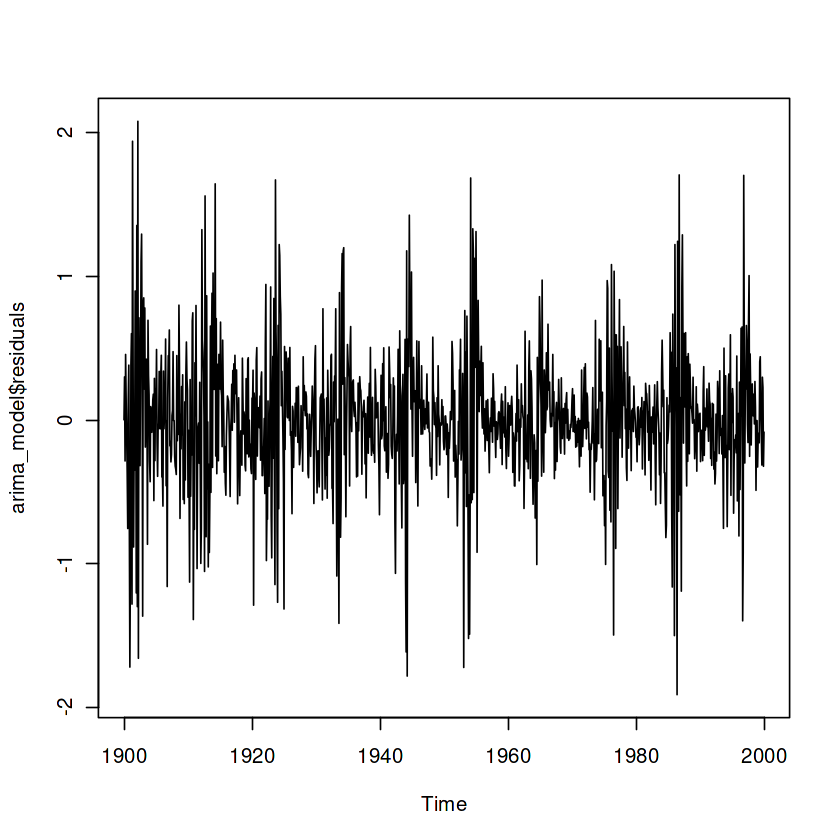

In [102]:
plot(arima_model$residuals)

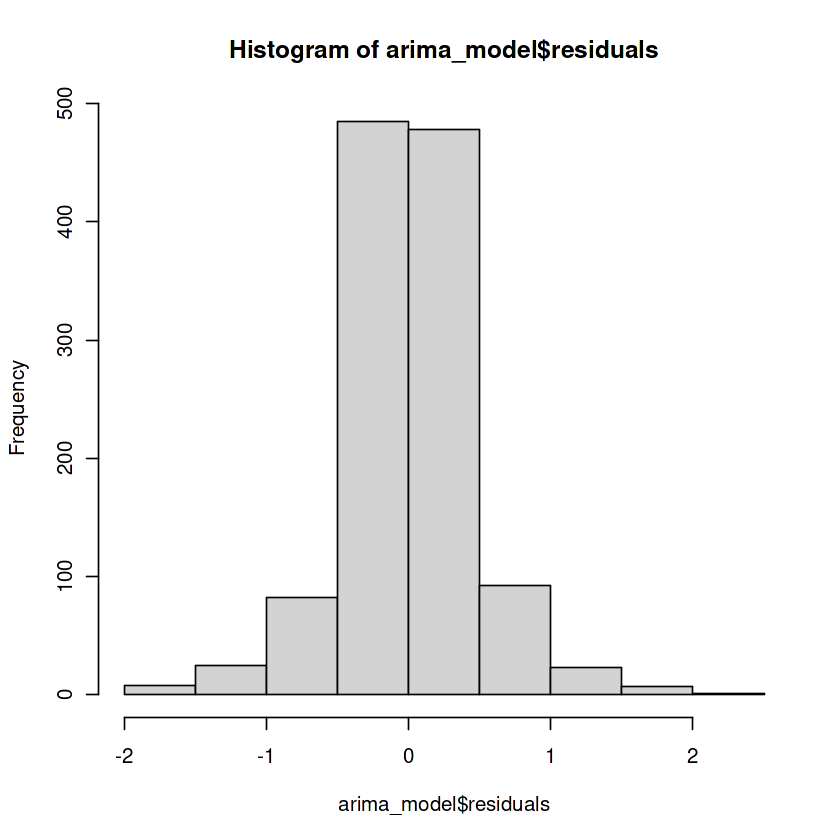

In [103]:
hist(arima_model$residuals)

The cyclical component still creeps in


### `Exponential Smoothing`



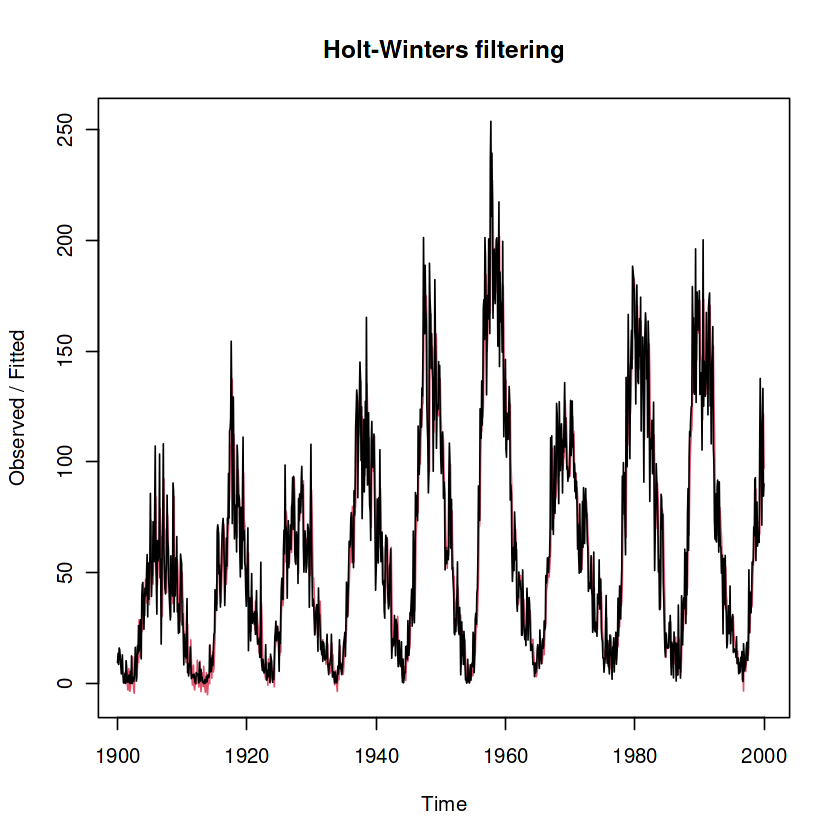

In [79]:
holts_smoothing = HoltWinters(ds_monthly)
plot(holts_smoothing)

In [106]:
# ETS model fitting
ets_model <- ets(log_monthly)
summary(ets_model)


ETS(A,Ad,N) 

Call:
 ets(y = log_monthly) 

  Smoothing parameters:
    alpha = 0.4006 
    beta  = 0.022 
    phi   = 0.9267 

  Initial states:
    l = 2.7752 
    b = -0.1355 

  sigma:  0.4619

     AIC     AICc      BIC 
6668.032 6668.103 6698.578 

Training set error measures:
                      ME      RMSE       MAE  MPE MAPE      MASE       ACF1
Training set 0.004473507 0.4609723 0.3265445 -Inf  Inf 0.4732155 0.07394034

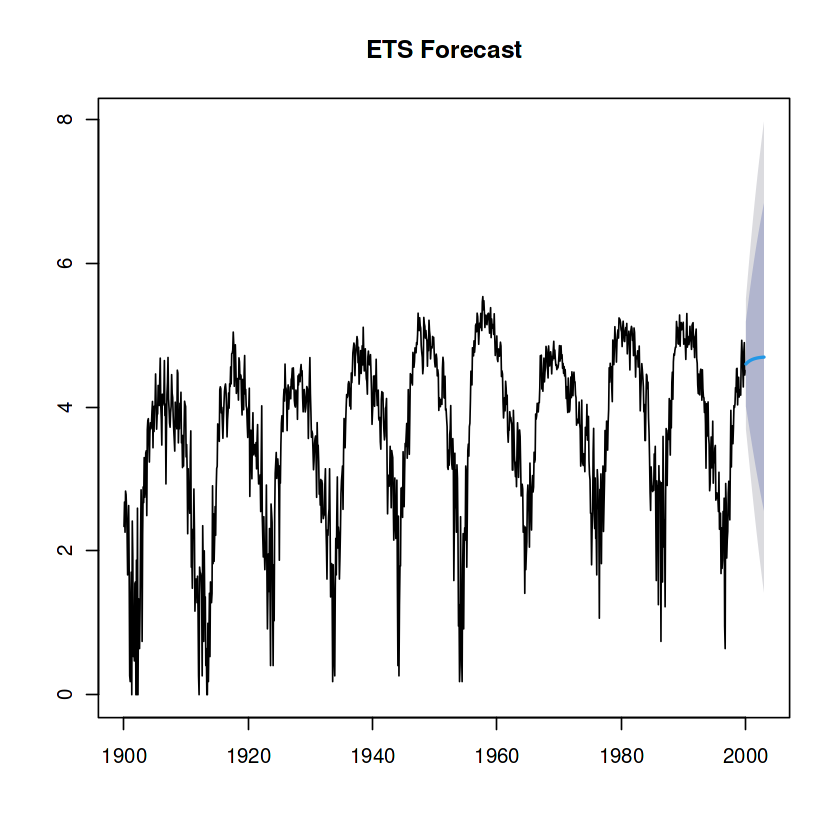

In [144]:
# Forecast using the ETS model
forecast_values_ets <- forecast(ets_model, h = 36) # Forecast for 2 years (24months)
plot(forecast_values_ets, main = "ETS Forecast")

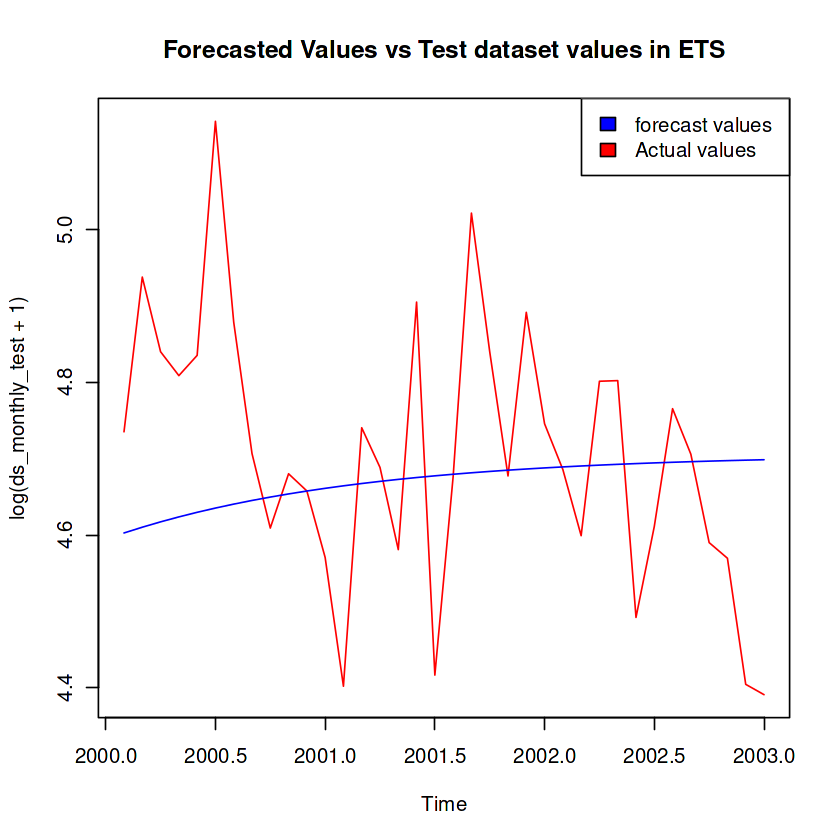

In [145]:
plot(log(ds_monthly_test+1),col="red",main="Forecasted Values vs Test dataset values in ETS")
lines(forecast_values_ets$mean,col="blue")
legend("topright", legend=c("forecast values", "Actual values"),  
       fill = c("blue","red") )

In [146]:
accuracy = forecast_values_ets$mean - log(ds_monthly_test+1)
cat("Testing Error on 36 data points:",sum(accuracy^2),'\n')
cat("Training Error :",ets_model$sigma2)

Testing Error on 36 data points: 1.263821 


Training Error : 0.2133838

Here testing error is even higher than the ARIMA model.

Hence we conclude that the ARIMA model is better than exponential smoothing for forecasting for this data. A cyclical component is present in the data of periodicity of around 10\-11 years.

